### Step 0: To start ... 

In [76]:
# Turn on multi-threading on your computer for faster calculation 
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


# Steps 1 and 2: Install and load the necessary packages and libraries

In [77]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.
from pandas.plotting import scatter_matrix, parallel_coordinates

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


%matplotlib inline 
import matplotlib.pylab as plt #%matplotlib inline renders the figure in a notebook

# Step 3: Load the data

In [78]:
jobs_df = pd.read_csv('final.csv')

In [79]:
jobs_df.head()

,jobTitle,jobCompany,jobLocation,jobSubClassification,jobClassification,jobSalary
0,Business Analyst at ACT Solutions Limited (Fre...,Jobsdb - SmartHire,Southern District,Engineering - Software,(Information & Communication Technology),NaN
1,Business System Analyst,TEKsystems,Central and Western District,Business/Systems Analysts,(Information & Communication Technology),"$55,000 – $65,000 per month"
2,Senior Business Analyst,Gientech Technology (Hong Kong) Limited,"('Wan Chai', 'Wan Chai District')",Business/Systems Analysts,(Information & Communication Technology),NaN
3,"Business Analyst, HRIS",ASMPT Technology Hong Kong Limited,"('Tsing Yi', 'Kwai Tsing Area')",Mechanical Engineering,(Engineering),NaN
4,"Business Analyst, Supply Chain Management",ASMPT Technology Hong Kong Limited,"('Tsing Yi', 'Kwai Tsing Area')",Business/Systems Analysts,(Information & Communication Technology),NaN


In [80]:
jobs_df.describe()

,jobTitle,jobCompany,jobLocation,jobSubClassification,jobClassification,jobSalary
count,64,62,102,120,120,28
unique,62,44,16,15,9,12
top,"('Business Analyst', 'Business Analyst', 'Busi...",Jobsdb - SmartHire,Central and Western District,Business/Systems Analysts,(Information & Communication Technology),"$55,000 – $65,000 per month"
freq,2,6,14,31,61,6


In [81]:
jobs_df.columns

Index(['jobTitle', 'jobCompany', 'jobLocation', 'jobSubClassification',
       'jobClassification', 'jobSalary'],
      dtype='object')

In [82]:
jobs_df['jobTitle'] = jobs_df['jobTitle'].str.split(',').str[0]
jobs_df['jobCompany'] = jobs_df['jobCompany'].str.split(',').str[0]

# Displaying the updated DataFrame
jobs_df.head()

,jobTitle,jobCompany,jobLocation,jobSubClassification,jobClassification,jobSalary
0,Business Analyst at ACT Solutions Limited (Fre...,Jobsdb - SmartHire,Southern District,Engineering - Software,(Information & Communication Technology),NaN
1,Business System Analyst,TEKsystems,Central and Western District,Business/Systems Analysts,(Information & Communication Technology),"$55,000 – $65,000 per month"
2,Senior Business Analyst,Gientech Technology (Hong Kong) Limited,"('Wan Chai', 'Wan Chai District')",Business/Systems Analysts,(Information & Communication Technology),NaN
3,Business Analyst,ASMPT Technology Hong Kong Limited,"('Tsing Yi', 'Kwai Tsing Area')",Mechanical Engineering,(Engineering),NaN
4,Business Analyst,ASMPT Technology Hong Kong Limited,"('Tsing Yi', 'Kwai Tsing Area')",Business/Systems Analysts,(Information & Communication Technology),NaN


In [83]:
print('Number of rows with valid jobSalary values before: ', 
      jobs_df['jobSalary'].count()) 
missingRows = jobs_df.sample(10).index
jobs_df.loc[missingRows, 'jobSalary'] = np.nan
print('Number of rows with valid jobSalary values after setting to NAN: ', 
      jobs_df['jobSalary'].count()) 
jobs_df['jobSalary'].count()

Number of rows with valid jobSalary values before:  28
Number of rows with valid jobSalary values after setting to NAN:  26


26

In [84]:
reduced_df = jobs_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  13


In [85]:
# Finding the most frequent value in 'jobSalary' column
most_frequent_salary = jobs_df['jobSalary'].mode()[0]

# Filling missing values with the most frequent value
jobs_df['jobSalary'] = jobs_df['jobSalary'].fillna(value=most_frequent_salary)

print('Number of rows with valid salary values after filling NA values: ',
      jobs_df['jobSalary'].count())


Number of rows with valid salary values after filling NA values:  120


In [86]:
jobs_df.dropna(subset=['jobCompany'], inplace=True)

In [87]:
jobs_df.describe()

,jobTitle,jobCompany,jobLocation,jobSubClassification,jobClassification,jobSalary
count,62,62,62,62,62,62
unique,57,44,15,15,8,6
top,Business Analyst,Jobsdb - SmartHire,Central and Western District,Business/Systems Analysts,(Information & Communication Technology),"$55,000 – $65,000 per month"
freq,4,6,8,18,34,53


In [88]:
jobs_df['jobClassification'] = jobs_df['jobClassification'].str.replace(r'[()]', '', regex=True)

In [89]:
jobs_df['jobTitle'] = jobs_df['jobTitle'].str.replace(r'[()]', '', regex=True)

In [90]:
jobs_df['jobCompany'] = jobs_df['jobCompany'].str.replace(r'[()]', '', regex=True)
jobs_df['jobLocation'] = jobs_df['jobLocation'].str.replace(r'[()]', '', regex=True)


In [91]:
jobs_df.head()

,jobTitle,jobCompany,jobLocation,jobSubClassification,jobClassification,jobSalary
0,Business Analyst at ACT Solutions Limited Fres...,Jobsdb - SmartHire,Southern District,Engineering - Software,Information & Communication Technology,"$55,000 – $65,000 per month"
1,Business System Analyst,TEKsystems,Central and Western District,Business/Systems Analysts,Information & Communication Technology,"$55,000 – $65,000 per month"
2,Senior Business Analyst,Gientech Technology Hong Kong Limited,"'Wan Chai', 'Wan Chai District'",Business/Systems Analysts,Information & Communication Technology,"$55,000 – $65,000 per month"
3,Business Analyst,ASMPT Technology Hong Kong Limited,"'Tsing Yi', 'Kwai Tsing Area'",Mechanical Engineering,Engineering,"$55,000 – $65,000 per month"
4,Business Analyst,ASMPT Technology Hong Kong Limited,"'Tsing Yi', 'Kwai Tsing Area'",Business/Systems Analysts,Information & Communication Technology,"$55,000 – $65,000 per month"


In [92]:
jobs_df['jobCompany'] = jobs_df['jobCompany'].str.replace("'", '')
jobs_df['jobTitle'] = jobs_df['jobTitle'].str.replace("'", '')
jobs_df['jobLocation'] = jobs_df['jobLocation'].str.replace("'", '')

In [93]:
jobs_df.head()

,jobTitle,jobCompany,jobLocation,jobSubClassification,jobClassification,jobSalary
0,Business Analyst at ACT Solutions Limited Fres...,Jobsdb - SmartHire,Southern District,Engineering - Software,Information & Communication Technology,"$55,000 – $65,000 per month"
1,Business System Analyst,TEKsystems,Central and Western District,Business/Systems Analysts,Information & Communication Technology,"$55,000 – $65,000 per month"
2,Senior Business Analyst,Gientech Technology Hong Kong Limited,"Wan Chai, Wan Chai District",Business/Systems Analysts,Information & Communication Technology,"$55,000 – $65,000 per month"
3,Business Analyst,ASMPT Technology Hong Kong Limited,"Tsing Yi, Kwai Tsing Area",Mechanical Engineering,Engineering,"$55,000 – $65,000 per month"
4,Business Analyst,ASMPT Technology Hong Kong Limited,"Tsing Yi, Kwai Tsing Area",Business/Systems Analysts,Information & Communication Technology,"$55,000 – $65,000 per month"


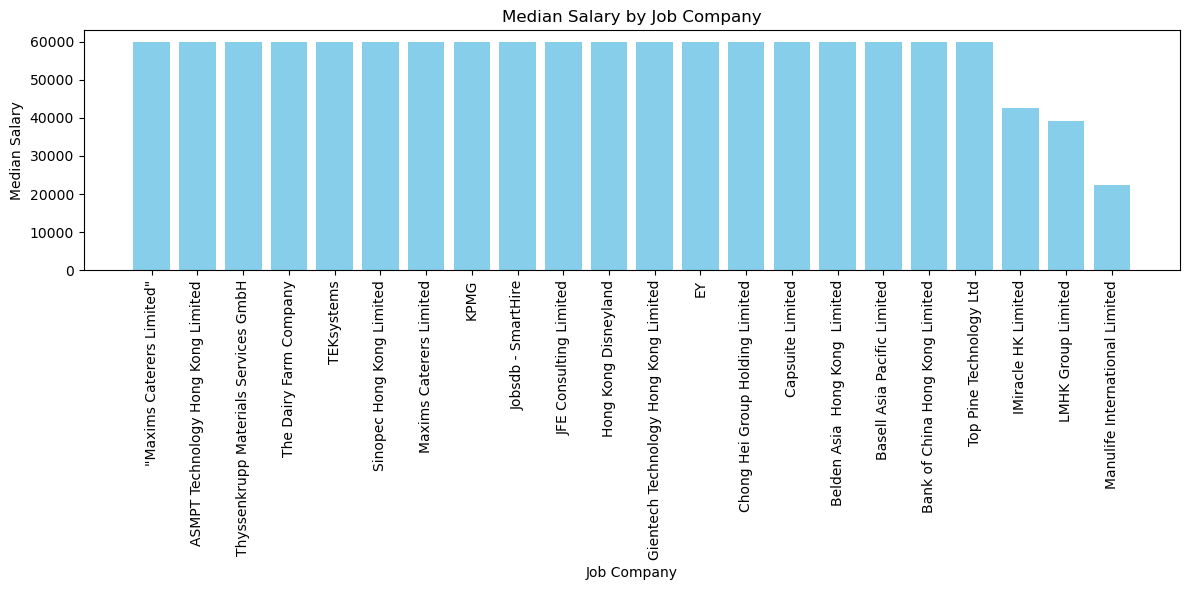

In [94]:
import re
import numpy as np

# Function to extract salary from the given string
def extract_salary(salary_string):
    # Regular expression pattern to match salary values
    pattern = r'\$([\d,]+) – \$([\d,]+)'
    
    # Using regex to find matches
    matches = re.search(pattern, salary_string)
    
    if matches:
        # Extracting lower and upper salary bounds
        lower_salary = float(matches.group(1).replace(',', ''))
        upper_salary = float(matches.group(2).replace(',', ''))
        
        # Calculating median salary
        median_salary = (lower_salary + upper_salary) / 2
        return median_salary
    else:
        return np.nan  # Return NaN if pattern is not found

# Applying the function to the 'jobSalary' column
jobs_df['jobSalary'] = jobs_df['jobSalary'].apply(extract_salary)

# Removing rows with NaN values in 'jobSalary' column
jobs_df.dropna(subset=['jobSalary'], inplace=True)

# Grouping the data by job company and calculating the median salary for each company
company_salary = jobs_df.groupby('jobCompany')['jobSalary'].median().reset_index()

# Sorting the data by median salary
company_salary = company_salary.sort_values(by='jobSalary', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(company_salary['jobCompany'], company_salary['jobSalary'], color='skyblue')
plt.xlabel('Job Company')
plt.ylabel('Median Salary')
plt.title('Median Salary by Job Company')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()



/var/folders/b7/rlt7pjz13wn8gynq1jht74400000gn/T/ipykernel_60624/2760617979.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


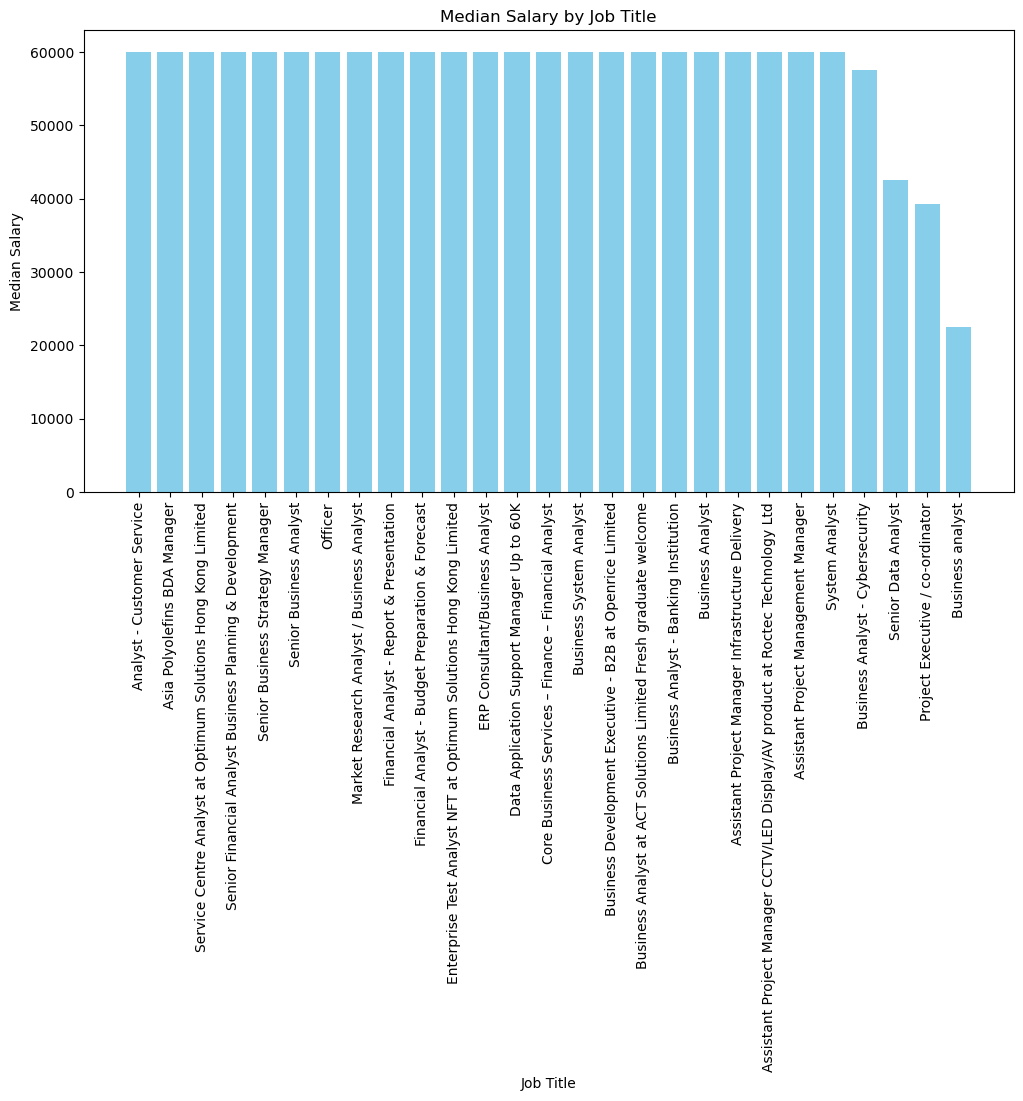

In [95]:
# Grouping the data by job title and calculating the median salary for each title
title_salary = jobs_df.groupby('jobTitle')['jobSalary'].median().reset_index()

# Sorting the data by median salary
title_salary = title_salary.sort_values(by='jobSalary', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(title_salary['jobTitle'], title_salary['jobSalary'], color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Median Salary')
plt.title('Median Salary by Job Title')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()


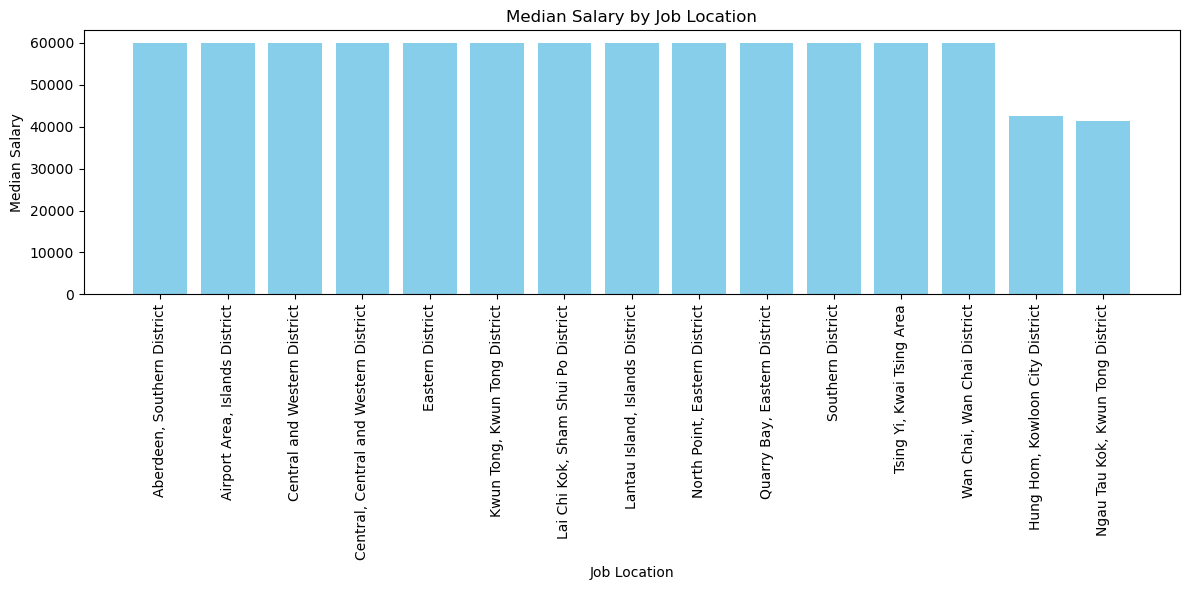

In [96]:
# Grouping the data by job title and calculating the median salary for each title
location_salary = jobs_df.groupby('jobLocation')['jobSalary'].median().reset_index()

# Sorting the data by median salary
location_salary = location_salary.sort_values(by='jobSalary', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(location_salary['jobLocation'], location_salary['jobSalary'], color='skyblue')
plt.xlabel('Job Location')
plt.ylabel('Median Salary')
plt.title('Median Salary by Job Location')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

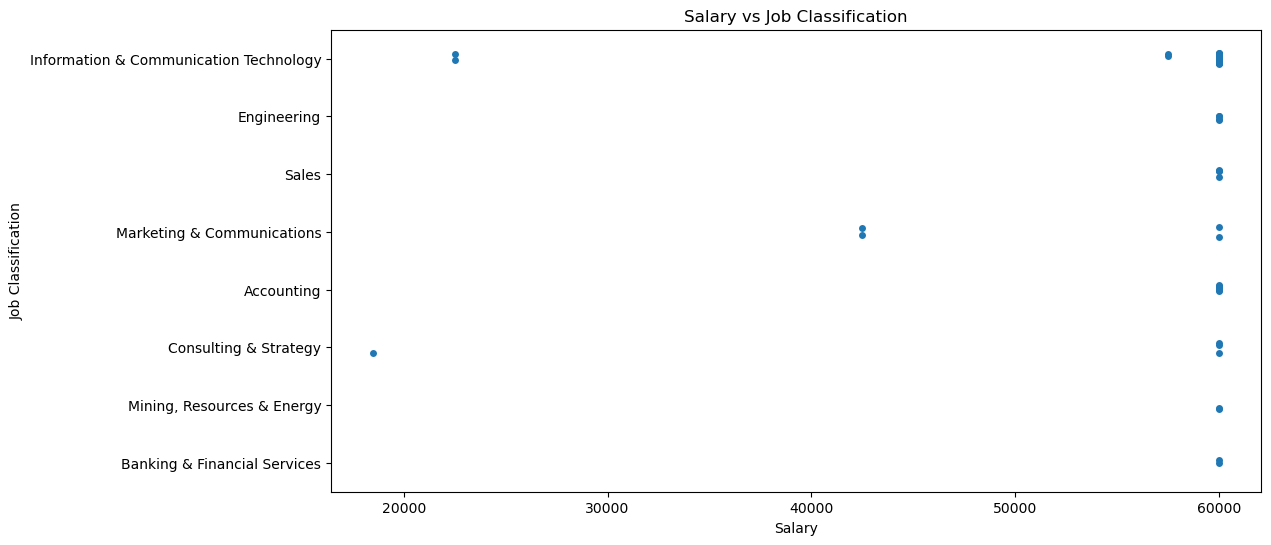

In [100]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.stripplot(x='jobSalary', y='jobClassification', data=jobs_df, jitter=True)
plt.xlabel('Salary')
plt.ylabel('Job Classification')
plt.title('Salary vs Job Classification')
plt.show()


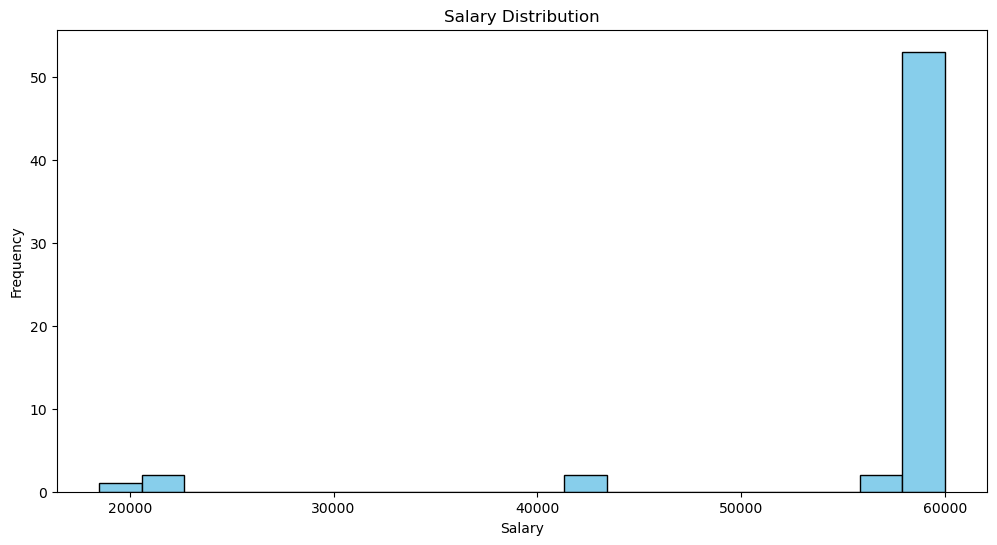

In [101]:
plt.figure(figsize=(12, 6))
plt.hist(jobs_df['jobSalary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()


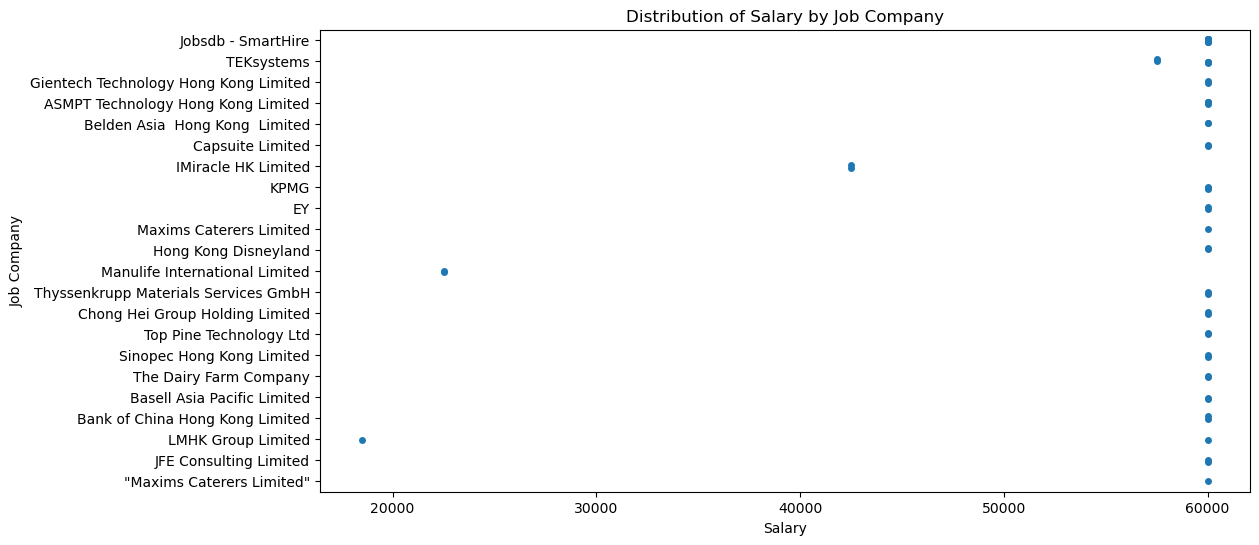

In [103]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='jobSalary', y='jobCompany', data=jobs_df, jitter=True)
plt.xlabel('Salary')
plt.ylabel('Job Company')
plt.title('Distribution of Salary by Job Company')
plt.show()


In [104]:
jobs_df.head()

,jobTitle,jobCompany,jobLocation,jobSubClassification,jobClassification,jobSalary
0,Business Analyst at ACT Solutions Limited Fres...,Jobsdb - SmartHire,Southern District,Engineering - Software,Information & Communication Technology,60000.0
1,Business System Analyst,TEKsystems,Central and Western District,Business/Systems Analysts,Information & Communication Technology,60000.0
2,Senior Business Analyst,Gientech Technology Hong Kong Limited,"Wan Chai, Wan Chai District",Business/Systems Analysts,Information & Communication Technology,60000.0
3,Business Analyst,ASMPT Technology Hong Kong Limited,"Tsing Yi, Kwai Tsing Area",Mechanical Engineering,Engineering,60000.0
4,Business Analyst,ASMPT Technology Hong Kong Limited,"Tsing Yi, Kwai Tsing Area",Business/Systems Analysts,Information & Communication Technology,60000.0


In [106]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



categorical_features = ['jobTitle', 'jobCompany','jobLocation','jobSubClassification','jobClassification']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply preprocessing steps to columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Splitting the data into features (X) and target variable (y)
X = jobs_df.drop('jobSalary', axis=1)  # Assuming jobSalary is the target variable
y = jobs_df['jobSalary']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 143708833.47223836


In [107]:
from sklearn.metrics import mean_absolute_error

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Calculating the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 3582.3515017587165
